Import Libraries and Data

In [ ]:
# importing libs
import pandas as pd
import matplotlib.pyplot as plt
import ast
import seaborn as sns

# loading local data
df = pd.read_csv("/Users/suegreen/Downloads/projects/data/3_Project/data_jobs.csv")

# data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


Group the Skills by Month

In [2]:
## Skill count per month for data analysts
df_DA_DE = df[(df['job_title'] == 'Data Analyst') & (df['job_country'] == 'Germany')].copy()

df_DA_DE['job_posted_month_no'] = df_DA_DE['job_posted_date'].dt.month

# Explode job_skills column
df_DA_DE_explode = df_DA_DE.explode('job_skills')

Pivot in Prep for Plotting

In [3]:
# Group by month and job_skills
df_DA_DE_pivot = df_DA_DE_explode.pivot_table(index='job_posted_month_no', columns='job_skills',  aggfunc='size', fill_value=0)

df_DA_DE_pivot

job_skills,airflow,alteryx,angular,ansible,assembly,atlassian,aurora,aws,azure,bash,...,typescript,unity,unix,vb.net,vba,visio,visual basic,webex,windows,word
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,3,0,0,0,0,4,0,1,4,0,...,0,0,0,0,1,1,1,1,0,0
2,0,0,1,0,0,2,0,0,5,0,...,0,0,1,0,3,0,0,0,2,2
3,2,0,0,0,0,0,0,2,6,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,1,0,0,0,1,1,3,0,...,1,0,0,0,0,0,0,0,0,0
5,1,0,0,1,0,1,1,1,3,0,...,0,0,0,0,1,0,0,0,0,0
6,1,0,0,0,0,1,0,1,3,0,...,0,0,0,0,1,0,0,0,0,0
7,0,0,0,0,0,1,0,3,0,0,...,0,0,0,0,1,2,0,0,0,3
8,0,0,0,0,0,0,0,2,1,0,...,0,0,0,0,1,0,0,0,0,0
9,0,4,0,0,0,0,0,1,4,0,...,0,0,0,1,2,0,0,0,0,1


Sort columns by count and change month numbers to names

In [7]:

# sorts by count

# First add the Total row
df_DA_DE_pivot.loc['Total'] = df_DA_DE_pivot.sum()

# Then sort the columns based on Total
df_DA_DE_pivot = df_DA_DE_pivot[df_DA_DE_pivot.loc['Total'].sort_values(ascending=False).index]

# Finally drop the Total row
df_DA_DE_pivot = df_DA_DE_pivot.drop('Total')

df_DA_DE_pivot

job_skills,sql,python,tableau,r,power bi,excel,qlik,looker,sap,go,...,kafka,symphony,webex,visual basic,jenkins,unity,elasticsearch,tidyr,bash,crystal
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,23,18,15,8,6,6,2,3,0,4,...,0,1,1,1,0,0,0,0,0,0
2,21,19,13,4,10,11,4,5,1,5,...,0,0,0,0,0,0,0,0,0,0
3,27,20,11,10,16,14,2,0,2,2,...,0,0,0,0,1,0,0,0,0,0
4,25,28,7,16,8,5,2,4,3,5,...,1,0,0,0,0,0,1,0,0,0
5,23,21,13,11,7,8,2,4,2,2,...,0,0,0,0,0,0,0,0,0,0
6,17,15,6,6,4,1,3,2,0,5,...,0,0,0,0,0,0,0,1,0,0
7,18,15,7,6,5,7,3,2,1,3,...,0,0,0,0,0,0,0,0,0,0
8,11,9,5,4,4,2,4,2,2,3,...,0,0,0,0,0,0,0,0,0,0
9,36,23,18,11,18,12,4,3,5,3,...,0,0,0,0,0,0,0,0,0,1


Plot the Monthly Skill Counts

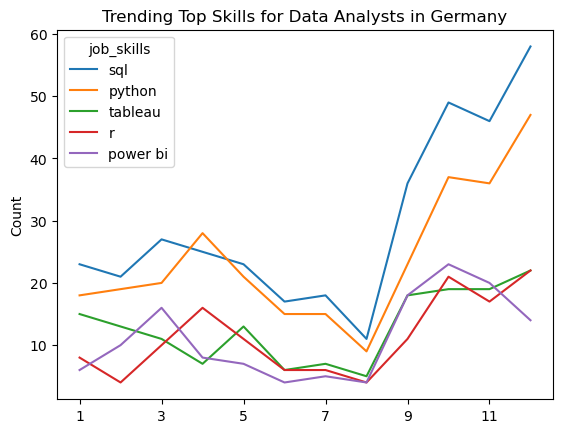

In [8]:

df_DA_DE_pivot.iloc[:, :5].plot(kind='line')

plt.title('Trending Top Skills for Data Analysts in Germany')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

Calculate Percentage of Total Jobs

In [9]:
# Get monthly totals
DA_totals = df_DA_DE.groupby('job_posted_month_no').size()

DA_totals

job_posted_month_no
1      32
2      39
3      44
4      47
5      38
6      24
7      28
8      19
9      99
10    111
11    113
12    109
dtype: int64

In [10]:
# divide first 12 rows of df_DA_pivot by DA_totals
df_DA_DE_percent = df_DA_DE_pivot.iloc[:12].div(DA_totals/100, axis=0)

# changes month number to month name
df_DA_DE_percent = df_DA_DE_percent.reset_index()
df_DA_DE_percent['job_posted_month'] = df_DA_DE_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_DE_percent = df_DA_DE_percent.set_index('job_posted_month')
df_DA_DE_percent = df_DA_DE_percent.drop(columns='job_posted_month_no')

df_DA_DE_percent

job_skills,sql,python,tableau,r,power bi,excel,qlik,looker,sap,go,...,kafka,symphony,webex,visual basic,jenkins,unity,elasticsearch,tidyr,bash,crystal
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,71.875000,56.250000,46.875000,25.000000,18.750000,18.750000,6.250000,9.375000,0.000000,12.500000,...,0.00000,3.125,3.125,3.125,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
Feb,53.846154,48.717949,33.333333,10.256410,25.641026,28.205128,10.256410,12.820513,2.564103,12.820513,...,0.00000,0.000,0.000,0.000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
Mar,61.363636,45.454545,25.000000,22.727273,36.363636,31.818182,4.545455,0.000000,4.545455,4.545455,...,0.00000,0.000,0.000,0.000,2.272727,0.000000,0.00000,0.000000,0.000000,0.000000
Apr,53.191489,59.574468,14.893617,34.042553,17.021277,10.638298,4.255319,8.510638,6.382979,10.638298,...,2.12766,0.000,0.000,0.000,0.000000,0.000000,2.12766,0.000000,0.000000,0.000000
May,60.526316,55.263158,34.210526,28.947368,18.421053,21.052632,5.263158,10.526316,5.263158,5.263158,...,0.00000,0.000,0.000,0.000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
Jun,70.833333,62.500000,25.000000,25.000000,16.666667,4.166667,12.500000,8.333333,0.000000,20.833333,...,0.00000,0.000,0.000,0.000,0.000000,0.000000,0.00000,4.166667,0.000000,0.000000
Jul,64.285714,53.571429,25.000000,21.428571,17.857143,25.000000,10.714286,7.142857,3.571429,10.714286,...,0.00000,0.000,0.000,0.000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
Aug,57.894737,47.368421,26.315789,21.052632,21.052632,10.526316,21.052632,10.526316,10.526316,15.789474,...,0.00000,0.000,0.000,0.000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
Sep,36.363636,23.232323,18.181818,11.111111,18.181818,12.121212,4.040404,3.030303,5.050505,3.030303,...,0.00000,0.000,0.000,0.000,0.000000,0.000000,0.00000,0.000000,0.000000,1.010101


Plot Monthly Skill Demand

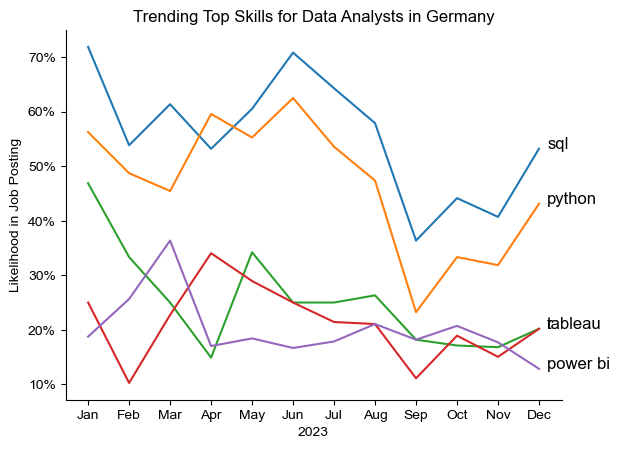

In [11]:

from matplotlib.ticker import PercentFormatter

df_plot = df_DA_DE_percent.iloc[:, :5]
sns.lineplot(data=df_plot, dashes=False, legend='full', palette='tab10')
sns.set_theme(style='ticks')
sns.despine() # remove top and right spines

plt.title('Trending Top Skills for Data Analysts in Germany')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
plt.legend().remove()
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=0))

# annotate the plot with the top 5 skills using plt.text()
for i in range(5):
    plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i], color='black')

plt.show()